#**Umelá inteligencia a neurónové sieťe - Weather prediction**

## **Load Data**

*   **import pandas as pd**: Načítanie knižnice pandas, ktorá sa používa na manipuláciu s dátami v tabuľkách (DataFrame).
*   **pd.read_csv()**: Načítanie CSV súboru obsahujúceho dáta o počasí. delimiter=';' znamená, že hodnoty v CSV sú oddelené bodkočiarkou. index_col="datum" nastavi index na stĺpec "datum", aby sa stal indexom dátového rámca.


In [1]:
import pandas as pd
# Načítanie datasetu o počasí z CSV súboru - oddeľovač je ";", index "datum"
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pocasie.csv", delimiter=';', index_col="datum")
# Zobrazenie datasetu
weather

,den,t_min,t_max,t_priem,ros_bod,vietor,max_naraz,zrazky,sneh,pocasie
datum,,,,,,,,,,
1986-01-01,St,-14.4,0.0,-7.3,-8.7,1.2,3.1,0.3,3,Obrázok
1986-01-02,Št,-11.1,-1.5,-5.5,-6.1,2.6,3.1,0.3,4,Obrázok
1986-01-03,Pia,-3.0,2.0,-0.9,-1.9,2.9,5.1,1.3,5,Obrázok
1986-01-04,So,-1.0,3.0,0.6,-0.8,4.7,13.9,3.0,5,Obrázok
1986-01-05,Ne,-4.0,3.5,-1.1,-4.9,3.6,7.2,0.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-09,Ne,2.1,10.3,6.2,1.7,4.0,9.3,0.0,0,Obrázok
2018-12-10,Po,2.0,8.0,5.9,0.1,6.4,11.0,0.3,0,Obrázok
2018-12-11,Ut,1.5,5.0,2.9,0.2,6.0,10.8,1.3,0,Obrázok


## **Data Preparation**

### **Missing Data Analysis**



*   **apply(pd.isnull)**: Aplikuje funkciu pd.isnull (ktorá vracia True pre hodnoty NaN), na každý stĺpec v DataFrame.
*   **sum()**: Sčíta počet NaN hodnôt v každom stĺpci.
*   **/weather.shape[0]**: Počet NaN hodnôt je delený počtom riadkov v dátach (počet záznamov), aby sa získal podiel chýbajúcich hodnôt.





In [2]:
# Výpočet podielu chýbajúcich hodnôt pre každý stĺpec (hľadáme riadky s NaN hodnotami)
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
den,0.000000
t_min,0.000000
t_max,0.000000
t_priem,0.000000
ros_bod,0.000000
vietor,0.000000
max_naraz,0.000000
zrazky,0.000000
sneh,0.000000
pocasie,0.430342


### **Dropping Irrelevant Data**



*   Tento krok vyberá len niektoré stĺpce zo súboru a vytvára nový DataFrame, ktorý obsahuje iba relevantné údaje.


In [3]:
# Výber relevantných dát do nového Data Farame
weather = weather[["t_min", "t_max", "t_priem", "ros_bod", "vietor", "max_naraz", "zrazky", "sneh"]].copy()
# Kontrolné zobrazenie datasetu
weather

,t_min,t_max,t_priem,ros_bod,vietor,max_naraz,zrazky,sneh
datum,,,,,,,,
1986-01-01,-14.4,0.0,-7.3,-8.7,1.2,3.1,0.3,3
1986-01-02,-11.1,-1.5,-5.5,-6.1,2.6,3.1,0.3,4
1986-01-03,-3.0,2.0,-0.9,-1.9,2.9,5.1,1.3,5
1986-01-04,-1.0,3.0,0.6,-0.8,4.7,13.9,3.0,5
1986-01-05,-4.0,3.5,-1.1,-4.9,3.6,7.2,0.0,3
...,...,...,...,...,...,...,...,...
2018-12-09,2.1,10.3,6.2,1.7,4.0,9.3,0.0,0
2018-12-10,2.0,8.0,5.9,0.1,6.4,11.0,0.3,0
2018-12-11,1.5,5.0,2.9,0.2,6.0,10.8,1.3,0




*   Rovnaký krok ako predtým na kontrolu prítomnosti chýbajúcich hodnôt, tentokrát na novom DataFrame s vybranými stĺpcami.



In [4]:
# Opätovná kontrola chýbajúcich hodnôt
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
t_min,0.0
t_max,0.0
t_priem,0.0
ros_bod,0.0
vietor,0.0
max_naraz,0.0
zrazky,0.0
sneh,0.0


### **Confirming Numerical Data Types**



*   **weather.dtypes**: Tento príkaz vypíše dátové typy pre každý stĺpec v DataFrame weather.



In [5]:
# Zobrazenie dátových typov stĺpcov
weather.dtypes

,0
t_min,float64
t_max,float64
t_priem,float64
ros_bod,float64
vietor,float64
max_naraz,float64
zrazky,float64
sneh,int64


### **Inspecting Index Data Type**



*   **weather.index**: Tento príkaz zobrazuje index DataFrame weather, ktorý v tomto prípade obsahuje dátumy.


In [6]:
# Zobrazenie indexu (datum)
weather.index

Index(['1986-01-01', '1986-01-02', '1986-01-03', '1986-01-04', '1986-01-05',
       '1986-01-06', '1986-01-07', '1986-01-08', '1986-01-09', '1986-01-10',
       ...
       '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
       '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13'],
      dtype='object', name='datum', length=12023)

### **Converting Index to Datetime Format**



*   **pd.to_datetime(weather.index)**: Konvertuje index dát na datetime objekt, čo umožňuje manipuláciu s dátami na časovej osi.


In [7]:
# Konverzia indexu (datum) na typ dátumu
weather.index = pd.to_datetime(weather.index)
# Zobrazenie konvertovaného indexu
weather.index

DatetimeIndex(['1986-01-01', '1986-01-02', '1986-01-03', '1986-01-04',
               '1986-01-05', '1986-01-06', '1986-01-07', '1986-01-08',
               '1986-01-09', '1986-01-10',
               ...
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-13'],
              dtype='datetime64[ns]', name='datum', length=12023, freq=None)

### **Identifying Gaps in Yearly Data**



*   **weather.index.year**: Extrahuje rok z indexu.
*   **value_counts()**: Počíta počet výskytov jednotlivých rokov v indexe.
*   **sort_index()**: Triedi výsledky podľa roku.




In [8]:
# Zobrazenie počtu dní v jednotlivých rokch datasetu
weather.index.year.value_counts().sort_index()

,count
datum,
1986,365
1987,365
1988,366
1989,365
1990,365
1991,365
1992,366
1993,365
1994,365


### **Visual Inspection of Data for Gaps**



*   **plot()**: Pre vybrané stĺpce sa vykreslí graf s časovou osou.
*   Tento krok generuje grafy pre rôzne meteorologické ukazovatele.



#### **Temperature Plot**

<Axes: xlabel='datum'>

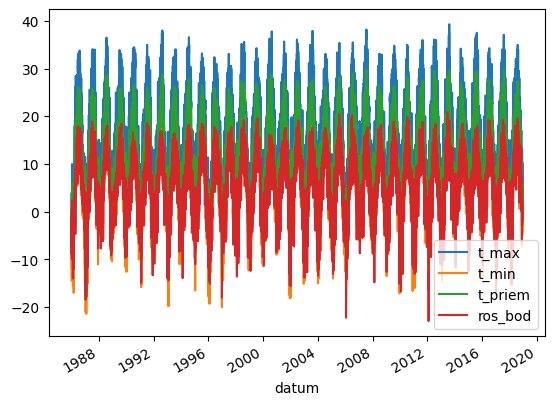

In [9]:
# Vizualizácia údajov o teplote (maximálna, minimálna, priemerná, rosný bod)
weather[["t_max", "t_min", "t_priem", "ros_bod"]].plot()

#### **Wind Plot**

<Axes: xlabel='datum'>

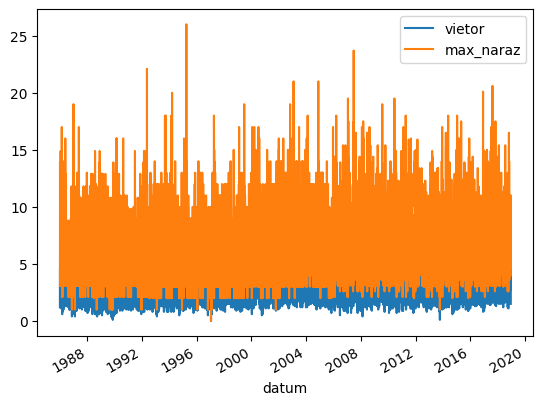

In [10]:
# Vizualizácia údajov o vetre (rýchlosť vetra, max. nárazy)
weather[["vietor", "max_naraz"]].plot()

#### **Rain Plot**

<Axes: xlabel='datum'>

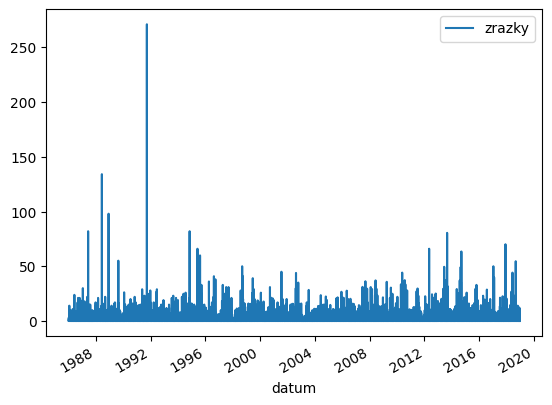

In [11]:
# Vizualizácia údajov o zrážkach
weather[["zrazky"]].plot()

#### **Snow Plot**

<Axes: xlabel='datum'>

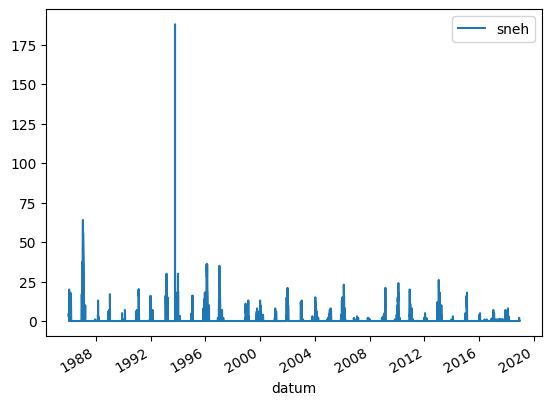

In [12]:
# Vizualizácia údajov o snehu
weather[["sneh"]].plot()

### **Defining Target for Prediction**



*   **shift(-1)**: Posúva hodnoty v stĺpci o 1 riadok smerom nadol. Tým sa vytvorí predpoveď pre nasledujúci deň, kde "target" je teplota nasledujúceho dňa (maximálna teplota).
*   **head(-1)**: Odstráni posledný riadok, pretože nemá cieľovú hodnotu pre predikciu (z dôvodu shift).




In [13]:
# Vytvorenie cieľovej premennej "target" (budúca maximálna teplota)
weather["target"] = weather.shift(-1)["t_max"]
# Odstránenie posledného riadku (pretože pre jeho predikciu nie je dostupná cieľová hodnota)
weather = weather.head(-1)
# Zobrazenie datasetu po odstránení posledného riadku
weather

,t_min,t_max,t_priem,ros_bod,vietor,max_naraz,zrazky,sneh,target
datum,,,,,,,,,
1986-01-01,-14.4,0.0,-7.3,-8.7,1.2,3.1,0.3,3,-1.5
1986-01-02,-11.1,-1.5,-5.5,-6.1,2.6,3.1,0.3,4,2.0
1986-01-03,-3.0,2.0,-0.9,-1.9,2.9,5.1,1.3,5,3.0
1986-01-04,-1.0,3.0,0.6,-0.8,4.7,13.9,3.0,5,3.5
1986-01-05,-4.0,3.5,-1.1,-4.9,3.6,7.2,0.0,3,0.2
...,...,...,...,...,...,...,...,...,...
2018-12-08,1.9,9.0,5.1,1.3,4.0,7.0,4.8,0,10.3
2018-12-09,2.1,10.3,6.2,1.7,4.0,9.3,0.0,0,8.0
2018-12-10,2.0,8.0,5.9,0.1,6.4,11.0,0.3,0,5.0


### **Predictor Variable Definition**



*   **predictors**: Zoznam stĺpcov, ktoré sa použijú ako vstupné premenné (prediktory) pre modely strojového učenia.



In [14]:
# Definovanie stĺpcov, ktoré budú použité ako prediktory pre model
predictors = ["t_max", "t_min", "t_priem", "ros_bod", "vietor", "max_naraz", "zrazky", "sneh"]

## **Model Building**

### **Model Backtesting and Evaluation Function**



*   **backtest**: Funkcia na vykonanie spätného testovania (backtesting) modelov. Rozdeľuje dáta na tréningové a testovacie sety, trénuje model a vyhodnocuje jeho predikcie.
*   **Cyklus for**: Tento cyklus prechádza dátami od indexu start až po posledný riadok datasetu. Krok step určuje, ako často sa testovacie množiny menia.
*   **train**: Tréningová množina obsahuje všetky riadky od začiatku datasetu až po aktuálny bod i.
*   **test**: Testovacia množina obsahuje nasledujúcich step riadkov, ktoré sa použijú na vyhodnotenie modelu.
*   **model.fit()**: Trénuje model na tréningových dátach. Vstupy sú hodnoty prediktorov a cieľová premenná (target), ktorú sa model snaží predikovať.
*   **model.predict()**: Generuje predikcie na základe testovacích dát.
*   **pd.Series(preds, index=test.index)**: Predikcie sa prevádzajú na pandas Series s rovnakým indexom ako testovacia množina, aby sa zachoval časový poriadok.
*   **pd.concat([test["target"], preds], axis=1)**: Kombinuje skutočné hodnoty (target) a predikcie do jedného DataFrame.
*   **combined["diff"] = (combined["prediction"] - combined["actual"]).abs()**: Vytvára nový stĺpec "diff", ktorý obsahuje absolútnu hodnotu rozdielu medzi predikovanými a skutočnými hodnotami.
*   **all_predictions.append(combined)**: Ukladá tento kombinovaný DataFrame do zoznamu all_predictions pre ďalšie spracovanie.
*   **pd.concat(all_predictions)**: Spojí všetky kombinované predikcie zo zoznamu all_predictions do jedného DataFrame, ktorý obsahuje všetky predikcie zo všetkých krokov.
*   **train_mae**: Výpočet strednej absolútnej chyby (MAE) pre tréningové dáta.
*   **train_r2**: Výpočet R² skóre pre tréningové dáta.
*   **test_mae**: Výpočet MAE pre všetky testovacie predikcie.
*   **test_r2**: Výpočet R² skóre pre všetky testovacie predikcie.
*   **pd.DataFrame()**: Vytvára DataFrame s výsledkami, ktorý obsahuje metriky pre tréningové a testovacie dáta. Tabuľka obsahuje názov metódy, MAE a R² pre tréningové aj testovacie dáta.
















In [15]:
# Import potrebných metód na hodnotenie modelu
from sklearn.metrics import mean_absolute_error, r2_score
# Funkcia pre spätné testovanie modelu
def backtest(weather, model, predictors, start=3650*3, step=90, method_name="Method"):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        # Rozdelenie na tréningovú a testovaciu vzorku
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]

        # Tréning modelu
        model.fit(train[predictors], train["target"])

        # Predikcie na testovacej vzorke
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        # Kombinovanie predikcií so skutočnými hodnotami
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)

    # Spojenie všetkých predikcií do jedného DataFrame
    all_predictions_df = pd.concat(all_predictions)

    # Výpočet metrík pre tréningové dáta
    train_preds = model.predict(weather.iloc[:start][predictors])
    train_actual = weather.iloc[:start]["target"]
    train_mae = mean_absolute_error(train_actual, train_preds)
    train_r2 = r2_score(train_actual, train_preds)

    # Výpočet metrík pre testovacie dáta
    test_mae = mean_absolute_error(all_predictions_df["actual"], all_predictions_df["prediction"])
    test_r2 = r2_score(all_predictions_df["actual"], all_predictions_df["prediction"])

    # Vytvorenie tabuľky s výsledkami
    results_table = pd.DataFrame([{
        "Method": method_name,
        "Training MAE": train_mae,
        "Training R2": train_r2,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }])

    return all_predictions_df, results_table

### **Ridge Regression**



*   **Ridge()**: Inicializuje model Ridge regresie.
*   **alpha=0.1**: Parameter alpha určuje intenzitu regularizácie. Vyššie hodnoty znamenajú silnejšiu regularizáciu, ktorá viac penalizuje koeficienty modelu.
*   **backtest()**: Volanie funkcie backtest.





             Method  Training MAE  Training R2  Test MAE   Test R2
0  Ridge Regression      2.414143     0.905096  2.306818  0.915314


<Axes: xlabel='datum'>

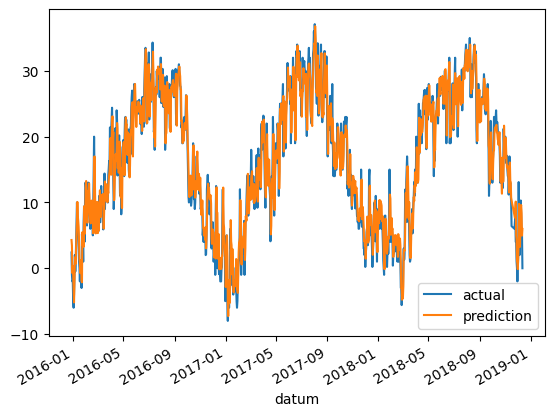

In [16]:
# Ridge regresia
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

predictions_ridge, results_ridge = backtest(weather, reg, predictors, method_name="Ridge Regression")

print(results_ridge)
predictions_ridge[["actual", "prediction"]].plot()

### **Lasso Regression**



*   **Lasso()**: Inicializuje model Lasso regresie.
*   **alpha=0.1**: Parameter alpha určuje intenzitu regularizácie. Vyššia hodnota alpha znamená silnejšiu regularizáciu a menší počet použitých vlastností.
*   **backtest()**: Volanie funkcie backtest.





             Method  Training MAE  Training R2  Test MAE  Test R2
0  Lasso Regression      2.421478     0.904789  2.315828  0.91494


<Axes: xlabel='datum'>

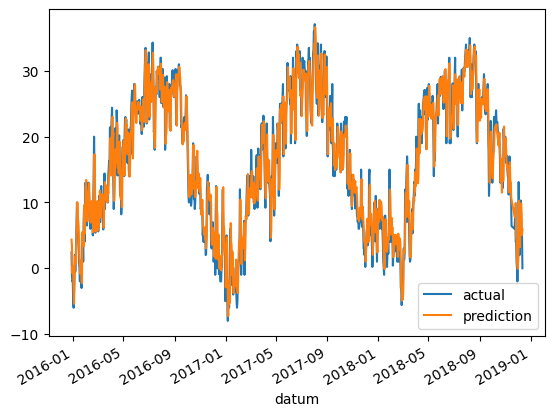

In [17]:
# Lasso regresia
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1)

predictions_lasso, results_lasso = backtest(weather, reg_lasso, predictors, method_name="Lasso Regression")

print(results_lasso)
predictions_lasso[["actual", "prediction"]].plot()

### **Random Forest**



*   **RandomForestRegressor()**: Inicializuje model Random Forest.
*   **n_estimators=100**: Počet stromov v lese. Vyšší počet stromov zlepšuje presnosť modelu, ale zvyšuje aj čas potrebný na trénovanie.
*   **random_state=42**: Inicializuje generátor náhodných čísel, aby bolo možné reprodukovať výsledky pri opakovaní experimentu.
*   **backtest()**: Volanie funkcie backtest.





          Method  Training MAE  Training R2  Test MAE  Test R2
0  Random Forest      0.895909     0.986634  2.314811  0.91513


<Axes: xlabel='datum'>

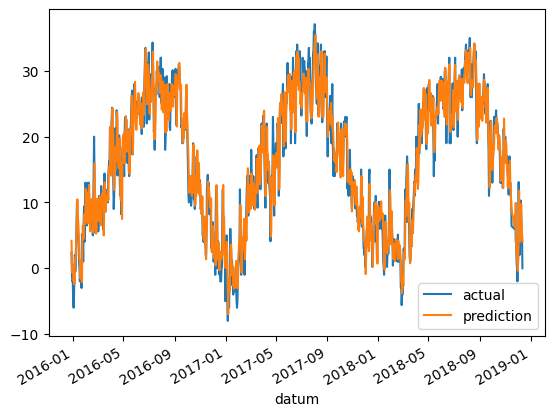

In [18]:
# Random Forest regresia
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)

predictions_rf, results_rf = backtest(weather, reg_rf, predictors, method_name="Random Forest")

print(results_rf)
predictions_rf[["actual", "prediction"]].plot()

### **Gradient Boosting**



*   **GradientBoostingRegressor()**: Inicializuje model Gradient Boosting.
*   **n_estimators=100**: Počet iterácií (počet stromov).
*   **learning_rate=0.1**: Učí sa s malým krokom, čo znamená, že každý ďalší strom bude mať menší vplyv na konečnú predikciu.
*   **max_depth=3**: Určuje maximálnu hĺbku každého jednotlivého rozhodovacieho stromu. Nižšia hĺbka zabraňuje prílišnej zložitosti modelu.
*   **random_state=42**: Inicializuje generátor náhodných čísel, aby bolo možné reprodukovať výsledky pri opakovaní experimentu.
*   **backtest()**: Volanie funkcie backtest.






              Method  Training MAE  Training R2  Test MAE  Test R2
0  Gradient Boosting       2.30058     0.913483  2.282844  0.91811


<Axes: xlabel='datum'>

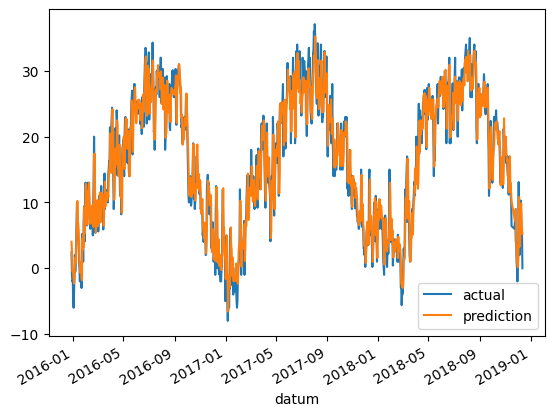

In [19]:
# Gradient Boosting regresia
from sklearn.ensemble import GradientBoostingRegressor

reg_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

predictions_gb, results_gb = backtest(weather, reg_gb, predictors, method_name="Gradient Boosting")

print(results_gb)
predictions_gb[["actual", "prediction"]].plot()

### **SVR**



*   **SVR()**: Inicializuje model Support Vector Regressor.
*   **kernel='rbf'**: Určuje použitie radial basis function (RBF) kernelu, ktorý je bežne používaný pre nelineárne dáta. Tento kernel transformuje dáta do vyšších dimenzií, kde sa môžu stať lineárne separovateľné.
*   **C=100**: Parameter C kontroluje rovnováhu medzi maximalizovaním okrajov a minimalizovaním chyby pri trénovaní modelu.
*   **epsilon=0.1**: Parametrizuje šírku pásma okolo predikcií, kde sa neberú do úvahy chyby. Tento parameter určuje, ako blízko k okraju sa model snaží prispôsobiť dáta.
*   **backtest()**: Volanie funkcie backtest.







  Method  Training MAE  Training R2  Test MAE   Test R2
0    SVR      2.231482     0.912502  2.201286  0.921201


<Axes: xlabel='datum'>

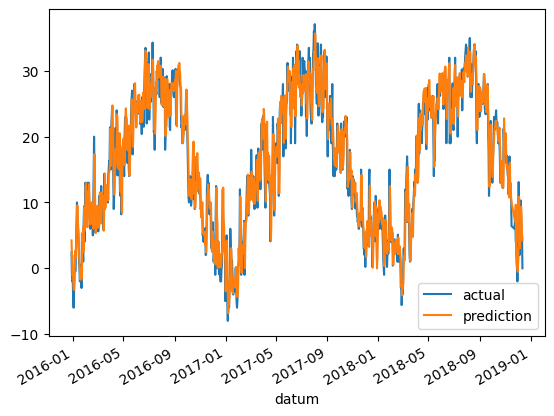

In [20]:
# SVR (Support Vector Regression)
from sklearn.svm import SVR

reg_svr = SVR(kernel='rbf', C=100, epsilon=0.1)

predictions_svr, results_svr = backtest(weather, reg_svr, predictors, method_name="SVR")

print(results_svr)
predictions_svr[["actual", "prediction"]].plot()

### **Multilayer Perceptron**



*   **MLPRegressor()**: Inicializuje model MultiLayer Perceptron (MLP).
*   **hidden_layer_sizes=(50,)**: Parametrizuje počet neurónov v skrytej vrstve. V tomto prípade je len jedna skrytá vrstva s 50 neurónmi.
*   **max_iter=1000**: Maximálny počet iterácií pri trénovaní modelu. Vyšší počet iterácií môže viesť k lepšiemu prispôsobeniu modelu dátam, ale môže zvyšovať čas trénovania.
*   **random_state=42**: Inicializuje generátor náhodných čísel, aby bolo možné reprodukovať výsledky pri opakovaní experimentu.
*   **backtest()**: Volanie funkcie backtest.





                  Method  Training MAE  Training R2  Test MAE   Test R2
0  MultiLayer Perceptron      2.358315     0.909347  2.290287  0.917934


<Axes: xlabel='datum'>

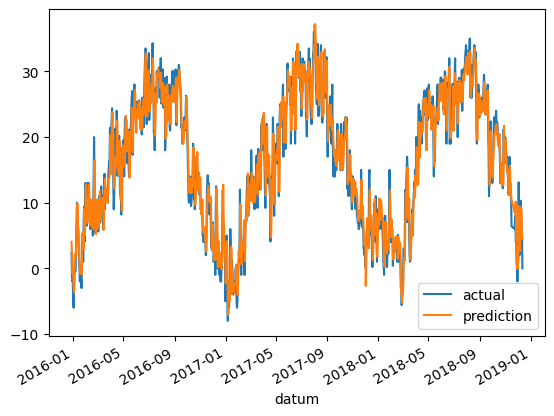

In [21]:
# Multi-layer perceptron (Neurónová sieť)
from sklearn.neural_network import MLPRegressor

reg_mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

predictions_mlp, results_mlp = backtest(weather, reg_mlp, predictors, method_name="MultiLayer Perceptron")

print(results_mlp)
predictions_mlp[["actual", "prediction"]].plot()

### **Model Comparison**



*   **concat()**: Kombinuje výsledky všetkých modelov do jedného DataFrame, ktorý obsahuje metriky pre tréningové a testovacie dáta.



In [22]:
# Spojenie výsledkov všetkých modelov do jedného DataFrame
df_models = pd.concat([results_ridge ,results_lasso, results_rf, results_gb, results_svr, results_mlp], axis=0).reset_index(drop=True)
# Zobrazenie konečných výsledkov pre všetky modely
df_models

,Method,Training MAE,Training R2,Test MAE,Test R2
0,Ridge Regression,2.414143,0.905096,2.306818,0.915314
1,Lasso Regression,2.421478,0.904789,2.315828,0.914940
2,Random Forest,0.895909,0.986634,2.314811,0.915130
3,Gradient Boosting,2.300580,0.913483,2.282844,0.918110
4,SVR,2.231482,0.912502,2.201286,0.921201
5,MultiLayer Perceptron,2.358315,0.909347,2.290287,0.917934


### **Save Best Prefroming Model**



*   **joblib.dump()**: Funkcia na uloženie modelu do súboru.



In [23]:
import joblib
# Uloženie najlepšieho modelu
joblib.dump(reg_svr, '/content/drive/MyDrive/Colab Notebooks/best_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/best_model.pkl']

## **Model Aplication**



*   **joblib.load()**: Funkcia na načítanie uloženého modelu zo súboru.
*   **predict_temperature()**: Funkcia na predikciu maximálnej teploty.
*   **new_data**: Nové údaje o počasí.
*   **model**: Predtrénovaný model, ktorý sa použije na predikciu.
*   **predictors**: Zoznam názvov stĺpcov, ktoré model používa na predikciu.
*   **input_data = pd.DataFrame([new_data])**: Konverzia nových údajov na DataFrame, aby ich model mohol spracovať.
*   **model.predict(input_data[predictors])[0]**: Použitie modelu na predikciu a vrátenie predikovanej hodnoty (maximálnej teploty).







In [24]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/best_model.pkl')
# Funkcia na predikciu maximálne teploty na základe nových údajov
def predict_temperature(new_data, model, predictors):
    # Konverzia nových údajov na DataFrame a predikcia
    input_data = pd.DataFrame([new_data])
    return model.predict(input_data[predictors])[0]

# Dáta o počasí (7.12.2024 - SNV)
new_weather_data = {
    "t_min": -7.0,
    "t_max": -5.0,
    "t_priem": -6.0,
    "ros_bod": -12.0,
    "vietor": 4.0,
    "max_naraz": 7.0,
    "zrazky": 0.0,
    "sneh": 0.0
}

predicted_temp = predict_temperature(new_weather_data, loaded_model, predictors)
print(f"Predikovaná maximálna teplota: {predicted_temp:.2f} °C") # Predikovaná max teplota na 8.12.2024 je 3.38 °C (Aktuálna predpoveď počasia hlási 3 °C)

Predikovaná maximálna teplota: -3.51 °C


## **Final Iteration**

  Method  Training MAE  Training R2  Test MAE   Test R2
0    SVR      2.231482     0.912502  2.201286  0.921201
            actual  prediction
datum                         
2015-12-29     2.4    4.232069
2015-12-30    -1.0    2.013793
2015-12-31    -2.0   -1.064112
2016-01-01    -1.9   -1.169320
2016-01-02    -5.0   -0.890985
...            ...         ...
2018-12-08    10.3    8.746913
2018-12-09     8.0    9.333183
2018-12-10     5.0    7.694768
2018-12-11     5.0    5.296500
2018-12-12     0.0    4.228305

[1072 rows x 2 columns]


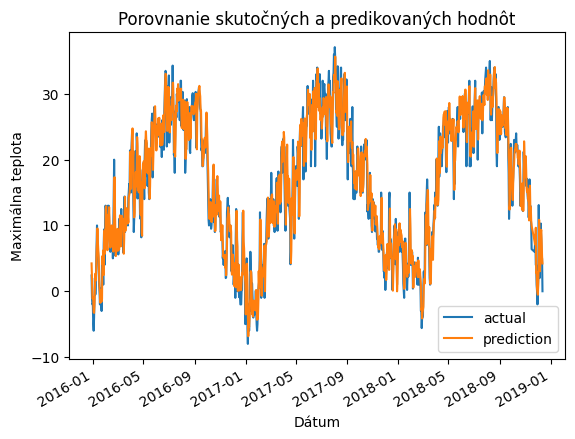


Predikcia s uloženým modelom:
Predikovaná maximálna teplota: 1.91 °C


In [25]:
# Importy knižníc
import pandas as pd
import joblib
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Funkcia na načítanie a prípravu dát
def load_data(filepath):
    weather = pd.read_csv(filepath, delimiter=';', index_col="datum")
    weather = weather[["t_min", "t_max", "t_priem", "ros_bod", "vietor", "max_naraz", "zrazky", "sneh"]].copy()
    weather.index = pd.to_datetime(weather.index)
    weather["target"] = weather.shift(-1)["t_max"]
    weather = weather.head(-1)
    return weather

# Funkcia pre spätné testovanie modelu
def backtest(weather, model, predictors, start=3650*3, step=90, method_name="Method"):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)

    all_predictions_df = pd.concat(all_predictions)
    train_preds = model.predict(weather.iloc[:start][predictors])
    train_actual = weather.iloc[:start]["target"]
    train_mae = mean_absolute_error(train_actual, train_preds)
    train_r2 = r2_score(train_actual, train_preds)
    test_mae = mean_absolute_error(all_predictions_df["actual"], all_predictions_df["prediction"])
    test_r2 = r2_score(all_predictions_df["actual"], all_predictions_df["prediction"])

    results_table = pd.DataFrame([{
        "Method": method_name,
        "Training MAE": train_mae,
        "Training R2": train_r2,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }])

    return all_predictions_df, results_table

# Funkcia na predikciu maximálnej teploty
def predict_temperature(new_data, model, predictors):
    input_data = pd.DataFrame([new_data])
    return model.predict(input_data[predictors])[0]

# Funkcia na vykreslenie grafu a tabuľky s výsledkami
def display_results(predictions_df):
    # Zobrazenie tabuľky
    print(predictions_df[["actual", "prediction"]])

    # Vykreslenie grafu
    predictions_df[["actual", "prediction"]].plot(title="Porovnanie skutočných a predikovaných hodnôt")
    plt.xlabel("Dátum")
    plt.ylabel("Maximálna teplota")
    plt.show()

# Hlavná funkcia programu
def main():
    # Načítanie dát
    weather = load_data("/content/drive/MyDrive/Colab Notebooks/pocasie.csv")

    # Prediktory (stĺpce, ktoré model používa)
    predictors = ["t_max", "t_min", "t_priem", "ros_bod", "vietor", "max_naraz", "zrazky", "sneh"]

    # SVR model
    reg_svr = SVR(kernel='rbf', C=100, epsilon=0.1)

    # Tréning a vyhodnotenie modelu
    predictions_svr, results_svr = backtest(weather, reg_svr, predictors, method_name="SVR")
    print(results_svr)

    # Uloženie najlepšieho modelu (SVR)
    joblib.dump(reg_svr, '/content/drive/MyDrive/Colab Notebooks/best_model.pkl')  # Uloženie modelu

    # Zobrazenie výsledkov (tabuľka + graf)
    display_results(predictions_svr)

    # Predikcia s uloženým modelom
    new_weather_data = {
        "t_min": -5.0,
        "t_max": 0.0,
        "t_priem": -2.5,
        "ros_bod": -2.0,
        "vietor": 4.0,
        "max_naraz": 7.0,
        "zrazky": 0.0,
        "sneh": 0.0
    }

    # Načítanie uloženého modelu
    loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/best_model.pkl')

    # Predikcia s načítaným modelom
    predicted_temp = predict_temperature(new_weather_data, loaded_model, predictors)
    print(f"\nPredikcia s uloženým modelom:")
    print(f"Predikovaná maximálna teplota: {predicted_temp:.2f} °C")

# Spustenie hlavnej funkcie
if __name__ == "__main__":
    main()

## **Model preformance**

In [26]:
predictions_svr.sort_values("diff", ascending=False)

,actual,prediction,diff
datum,,,
2017-12-10,14.0,3.240975,10.759025
2017-05-08,11.0,20.474817,9.474817
2018-12-03,13.1,3.972953,9.127047
2018-09-23,11.0,19.625656,8.625656
2017-05-19,17.0,25.544132,8.544132
...,...,...,...
2016-08-10,20.1,20.122446,0.022446
2016-10-22,13.1,13.115041,0.015041
2018-09-07,25.1,25.104981,0.004981


<Axes: title={'center': 'Trend teplôt 2017-12-01-2017-12-20'}, xlabel='datum'>

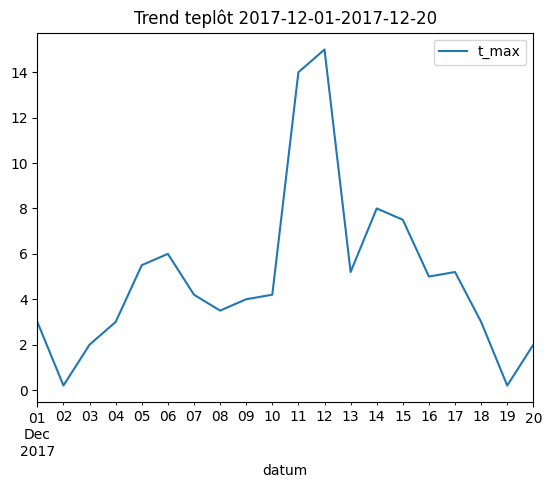

In [27]:
weather[["t_max"]].loc["2017-12-01":"2017-12-20"].plot(title="Trend teplôt 2017-12-01-2017-12-20")